In [2]:
#Import numpy for arrays
import numpy as np
#Import matplotlib.pyplot for plotting
import matplotlib.pyplot as plt
#Import Landlab raster arrays
from landlab import RasterModelGrid 
#Import landlab graph plotting
from landlab.plot.graph import plot_graph

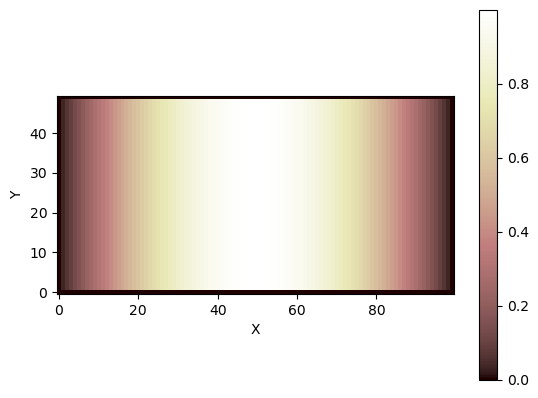

In [42]:
#generate raster grid
grid = RasterModelGrid((50, 100), xy_spacing=1.0)
#generate layer of ice thickness within grid
z_ice = grid.add_ones("ice_thickness", at="node")
#generate nice synthetic topography
x = grid.x_of_node
z_ice *= np.sin(np.pi*x/(grid.number_of_node_columns - 1))
z_ice[grid.boundary_nodes] *= 0
#generate layer of soil
z_soil = grid.add_ones("soil__depth", at="node")
#generate topography as a function of soil thickness and ice
elev =grid.add_zeros("topographic__elevation", at = "node")
elev = z_ice + z_soil
#plot topography
grid.imshow(z_ice)

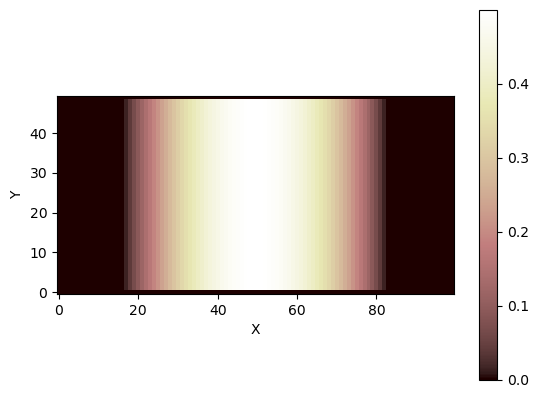

In [43]:
#create ThawIce function
class ThawIce:
    #define function and input
    def __init__ (self, ice_thickness):
        self.ice_thickness = ice_thickness 
    #define thaw function and inputs
    def thaw (self, thaw_rate, dt):
        self.thaw_rate = thaw_rate
        self.dt = dt
        for i in range(len(self.ice_thickness)):
            if self.ice_thickness[i] >= self.thaw_rate*self.dt:
                self.ice_thickness[i] = self.ice_thickness[i] - self.dt*self.thaw_rate
            else:
                self.ice_thickness[i] = 0
                
oop = ThawIce(ice_thickness = z_ice)

oop.thaw(thaw_rate = .5, dt = 1)

grid.imshow(oop.ice_thickness)